# ST1504 Deep Learning CA1: CIFAR-10 Dataset

In [2]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from livelossplot import PlotLossesKeras

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Change style of matplotlib
plt.style.use('seaborn')

# Tensorflow statistics
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.6.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## EDA

In [3]:
# Load Cifar10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
# Get shape of Data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


## CIFAR-10 Dataset
The CIFAR-10 Dataset contains 60000 32x32 colour images in 10 classes, with 6000 images per class.

In [5]:
# create array of labels

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
# see the first value of X_train
X_train[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
# Get value of y_train
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
# flatten the 2D y_train array to 1D
y_train = y_train.flatten()
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

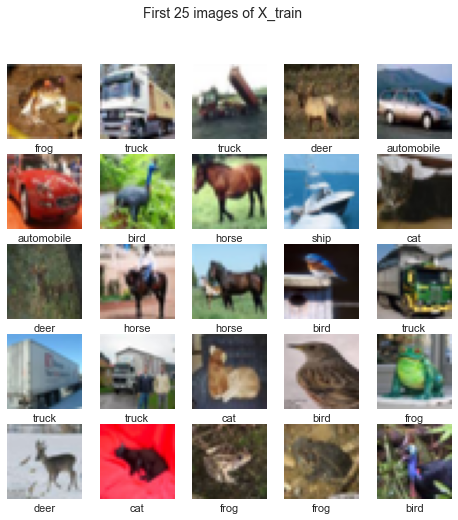

In [9]:
# Show first 4 images
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.suptitle("First 25 images of X_train", fontsize=14)
plt.show()

## Data Augmentation


In [10]:
from keras.preprocessing.image import ImageDataGenerator

dataGen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
)
dataGen.fit(X_train)

In [11]:
# # see example augmentation images
# for X_batch, y_batch in dataGen.flow(X_train, y_train, batch_size=9):
#     for i in range(0, 9):
#         plt.subplot(330 + 1 + i)
#         plt.imshow(X_batch[i].astype(np.uint8))
# plt.show()

In [12]:
# normalize dataset
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [14]:
# one-hot encode target column
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
X_train.shape

(50000, 32, 32, 3)

In [17]:
# define callbacks for early stopping and model checkpointing
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', patience=5),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='cifar10_model.h5',
        monitor='accuracy', save_best_only=True)
]


In [18]:
def plotLossAccGraph(result):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(result.history['loss'], label='Training Loss')
    ax1.plot(result.history['val_loss'], label='Validation Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    # ax1.set_ylim(bottom=0.0, top=0.6)
    ax1.legend()

    ax2.plot(result.history['accuracy'], label='Training Accuracy')
    ax2.plot(result.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    # ax2.set_ylim(bottom=0.85, top=1.0)
    ax2.legend()

    plt.show()


## CNN Model

In [19]:
# CNN Model

cnn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),

    tf.keras.layers.Conv2D(64, (2, 2), strides=1,activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
 
    tf.keras.layers.Conv2D(128, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Conv2D(256, (2, 2), strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(512, (2, 2), strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),



    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn_model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                    metrics=['accuracy'])
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 256)         1

In [20]:
# # fit cnn model
# cnn_result = cnn_model.fit(X_train, y_train, epochs=20,
#               validation_data=(X_test, y_test),
#               callbacks=callbacks)
# plotLossAccGraph(cnn_result) 

tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

## CNN with dataGen

Epoch 1/100
49/49 [==============================] - 30s 394ms/step - loss: 1.8258 - accuracy: 0.3164 - val_loss: 2.7240 - val_accuracy: 0.1000
Epoch 2/100
49/49 [==============================] - 19s 387ms/step - loss: 1.4035 - accuracy: 0.4867 - val_loss: 3.8862 - val_accuracy: 0.1000
Epoch 3/100
49/49 [==============================] - 19s 381ms/step - loss: 1.2363 - accuracy: 0.5550 - val_loss: 4.4194 - val_accuracy: 0.1000
Epoch 4/100
49/49 [==============================] - 19s 380ms/step - loss: 1.1443 - accuracy: 0.5912 - val_loss: 5.4824 - val_accuracy: 0.1000
Epoch 5/100
49/49 [==============================] - 20s 399ms/step - loss: 1.0694 - accuracy: 0.6219 - val_loss: 6.1896 - val_accuracy: 0.1035
Epoch 6/100
49/49 [==============================] - 19s 395ms/step - loss: 1.0159 - accuracy: 0.6418 - val_loss: 7.8204 - val_accuracy: 0.1000
Epoch 7/100
49/49 [==============================] - 19s 398ms/step - loss: 0.9774 - accuracy: 0.6526 - val_loss: 6.9326 - val_accuracy:

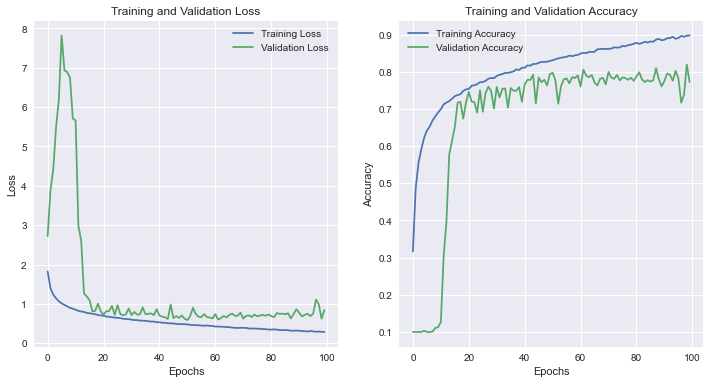

In [21]:
cnn_gen_result = cnn_model.fit(dataGen.flow(X_train, y_train, batch_size=1024), epochs=100, validation_data=(X_test, y_test))
plotLossAccGraph(cnn_gen_result)

In [22]:
# 2nd Model

model2 = tf.keras.Sequential([

    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),

    tf.keras.layers.Conv2D(128, (2, 2), strides=1,activation='relu'),
    tf.keras.layers.Conv2D(128, (2, 2), strides=1,activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
 
    tf.keras.layers.Conv2D(256, (2, 2), strides=1, activation='relu'),
    tf.keras.layers.Conv2D(256, (2, 2), strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Conv2D(512, (2, 2), strides=1, activation='relu'),
    tf.keras.layers.Conv2D(512, (2, 2), strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(1024, (2, 2), strides=1, activation='relu'),
    tf.keras.layers.Conv2D(1024, (2, 2), strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    # tf.keras.layers.Conv2D(1024, (2, 2), strides=1, activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model2.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                    metrics=['accuracy'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 31, 31, 128)       1664      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 15, 128)       512       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 256)       131328    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 256)         1024      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 512)        

In [23]:
model2_result = model2.fit(dataGen.flow(X_train, y_train, batch_size=1024), epochs=100, validation_data=(X_test, y_test))
plotLossAccGraph(model2_result)

Epoch 1/100
49/49 [==============================] - 21s 385ms/step - loss: 5.9167 - accuracy: 0.1258 - val_loss: 2.3071 - val_accuracy: 0.1000
Epoch 2/100
49/49 [==============================] - 19s 378ms/step - loss: 2.1535 - accuracy: 0.1571 - val_loss: 2.3733 - val_accuracy: 0.1000
Epoch 3/100
49/49 [==============================] - 18s 375ms/step - loss: 2.0999 - accuracy: 0.1641 - val_loss: 2.4264 - val_accuracy: 0.1000
Epoch 4/100
49/49 [==============================] - 19s 385ms/step - loss: 2.0816 - accuracy: 0.1698 - val_loss: 2.4211 - val_accuracy: 0.1000
Epoch 5/100
49/49 [==============================] - 18s 373ms/step - loss: 2.0732 - accuracy: 0.1718 - val_loss: 2.4274 - val_accuracy: 0.1000
Epoch 6/100
49/49 [==============================] - 18s 368ms/step - loss: 2.0726 - accuracy: 0.1737 - val_loss: 2.4153 - val_accuracy: 0.1015
Epoch 7/100
49/49 [==============================] - 18s 370ms/step - loss: 2.0620 - accuracy: 0.1759 - val_loss: 2.3921 - val_accuracy:

In [ ]:
# import image
from PIL import Image
img = Image.open('doge.jpg')
img = img.resize((32, 32), Image.ANTIALIAS)
img

In [ ]:
# Convert image to numpy array
imgArr = np.array(img)
imgArr.shape

In [ ]:
# normalize image
imgArr = imgArr / 255.0

In [ ]:
plt.imshow(imgArr)

In [ ]:
imgArr.shape

In [ ]:
imgArr = imgArr.reshape(1, 32, 32, 3)

In [ ]:
result = cnn_model.predict(imgArr)
print(np.argmax(result))
print("Predicted:",labels[np.argmax(result)])
